# ДОМАШНЯЯ РАБОТА 3

МЕТОД k БЛИЖАЙШИХ СОСЕДЕЙ(KNN). ВЫБОР ЧИСЛА СОСЕДЕЙ. КЛАССИФИКАЦИЯ

ДАНИЛЬЧЕНКО ВАДИМ

В этом задании вам нужно подобрать оптимальное значение k для алгоритма kNN. Будем использовать набор данных Wine, где требуется предсказать сорт винограда, из которого изготовлено вино, используя результаты химических анализов.
1. Загрузите выборку Wine по адресу https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data (файл также приложен к этому заданию)
2. Извлеките из данных признаки и классы. Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний. Более подробно о сути признаков можно прочитать по адресу https://archive.ics.uci.edu/ml/datasets/Wine (см. также файл wine.names, приложенный к заданию)
3. Оценку качества необходимо провести методом кросс-валидации по 5 блокам (5-fold). Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. В качестве меры качества используйте долю верных ответов (accuracy).
4. Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)? Данные результаты и будут ответами на вопросы 1 и 2.
5. Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на кросс-валидации.
6. Какое значение k получилось оптимальным после приведения признаков к одному масштабу? Приведите ответы на вопросы 3 и 4. Помогло ли масштабирование признаков?

In [231]:
#читаю файл с данными
import pandas as pd
df=pd.read_csv('wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [232]:
# класс
y=df[0]
# признаки
x=df.filter(items=df.columns[df.columns>0])
import sklearn
from sklearn.cross_validation import KFold, cross_val_score
#создадим генератор разбиений на тренировочную и тестовую выборки с параметрами:
#shuffle-перемешивает, n_folds-количество перемешанных блоков, random_state-генератор случайных чисел 
kf=KFold(len(y), n_folds=5, shuffle=True, random_state=42)

# найду точность классификации по методу ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# в классификатор циклом подставим разные значения количества соседей k в диапазоне от 1 до 50, проведем кросс-валидацию
# при каждом значении количетва соседей, разбивая на 5 блоков, затем посчитаем среднее значение оценки для каждого k
# и выберем лучшую оценку кросс-валидации и при каком k этого достигли
cv_score={} # будет хранить результаты оценки кросс-валидации
max_k, max_score=0,0 # значение k при лучшем качестве
for k in range(1,51):
    model=KNeighborsClassifier(n_neighbors=k)
    cv_score.setdefault(k,0)
    cv_score[k]=cross_val_score(model,x,y,cv=kf,scoring='accuracy').mean()
    if max_score<cv_score[k]:
        max_score=cv_score[k]
        max_k=k
max_score=round(max_score,2)
#print(round(max(cv_score.values()),2)==max_score) #проверка максимального значения
f'при к={max_k} было достигнуто максимальное качество: {max_score}'

'при к=1 было достигнуто максимальное качество: 0.73'

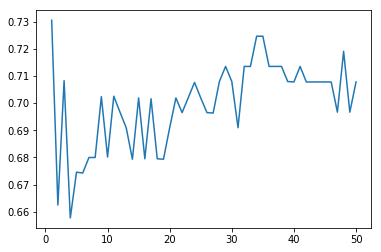

In [233]:
# убедимся в этом, посмотрев на график
import matplotlib.pyplot as plt
plt.plot(cv_score.keys(), cv_score.values())

In [234]:
#проведем масштабирование и найдем оценку после него
X=sklearn.preprocessing.scale(x)
# используем старый код
cv_score2={} # будет хранить результаты оценки кросс-валидации
max_k, max_score=0,0 # значение k при лучшем качестве
for k in range(1,51):
    model=KNeighborsClassifier(n_neighbors=k)
    cv_score2.setdefault(k,0)
    cv_score2[k]=cross_val_score(model,X,y,cv=kf,scoring='accuracy').mean()
    if max_score<cv_score2[k]:
        max_score=cv_score2[k]
        max_k=k
max_score=round(max_score,2)
#print(round(max(cv_score2.values()),2)==max_score) #проверка максимального значения
f'при к={max_k} было достигнуто максимальное качество: {max_score}'

'при к=29 было достигнуто максимальное качество: 0.98'

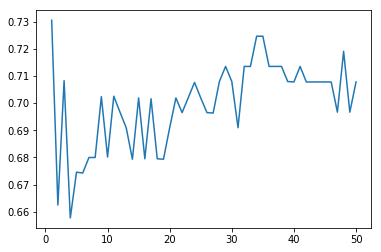

In [235]:
# убедимся в этом, посмотрев на график
import matplotlib.pyplot as plt
plt.plot(cv_score.keys(), cv_score.values())

In [236]:
# посмотрим на одном графике результат оценки для двух вариантов - до масштабирования и после
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x=list(cv_score.keys()), 
    y=list(cv_score.values()),
    name='before scaling'
)

trace1 = go.Scatter(
    x=list(cv_score2.keys()), 
    y=list(cv_score2.values()),
    name='after scaling'
)

data = [trace0, trace1]
layout = {'title': 'Accuracy before scaling and after'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

как мы можем заметить точность классификации после масштабирования стала выше, но максимальная достигается при к=29 (видно при наведении на график)

In [237]:
# найдем по одной строке для каждого класса для последующей проверки классификации
f'1: {df[df[0]==1].tail(1).index[0]} , 2: {df[df[0]==2].tail(1).index[0]} , 3: {df[df[0]==3].tail(1).index[0]}'

'1: 58 , 2: 129 , 3: 177'

In [238]:
# проведем проверку соответствия предсказанного класса заданному значению
import numpy as np
model=KNeighborsClassifier(n_neighbors=29)
model.fit(X,y)

X1_test=np.array(X[58]).reshape(1, -1)
X2_test=np.array(X[129]).reshape(1, -1)
X3_test=np.array(X[177]).reshape(1, -1)
#X_test
#df.loc[169]
print('предсказанный класс для 1: {}, для 2: {}, для 3: {}'.\
      format(model.predict(X1_test)[0],model.predict(X2_test)[0],model.predict(X3_test)[0]))

# посчитаем долю ошибок в предсказании принадлежности классу по всей выборке
err_list=[]
for i in range(0,len(df)):
    if model.predict(np.array(X[i]).reshape(1, -1))[0]!=df[0][i]:
        err_list.append(i)

f'доля ошибок в предсказанных значениях: {round(len(err_list)/len(df),2)}'

предсказанный класс для 1: 1, для 2: 2, для 3: 3


'доля ошибок в предсказанных значениях: 0.02'